### Number of QSO

Demo of the NQSO metric, which uses some additional data files from `rubin_sim_data/maf` that contain the luminosity function of QSOs. 

This metric calculates the expected number of QSO over the sky. The summary statistic is simply the sum. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [3]:
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')
print(runName)

baseline_v2.1_10yrs


In [4]:
bundle = {}
dustmap = maf.DustMap(nside=64)
s = maf.HealpixSlicer(nside=64, use_cache=False)
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    m = maf.QSONumberCountsMetric(f)
    sql = f'filter = "{f}" and note not like "%DD%"'
    bundle[f] = maf.MetricBundle(m, s, sql, 
                                 run_name=runName, 
                                 maps_list=[dustmap],
                                 info_label=f'{f} band non-DD')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
g = maf.MetricBundleGroup(bundle, baseline_file, 'temp', None)
g.run_all()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 215 bins, returning 200
  warnings.warn(


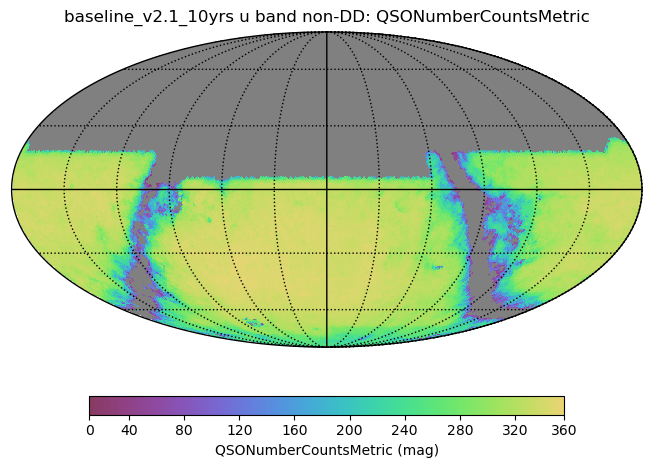

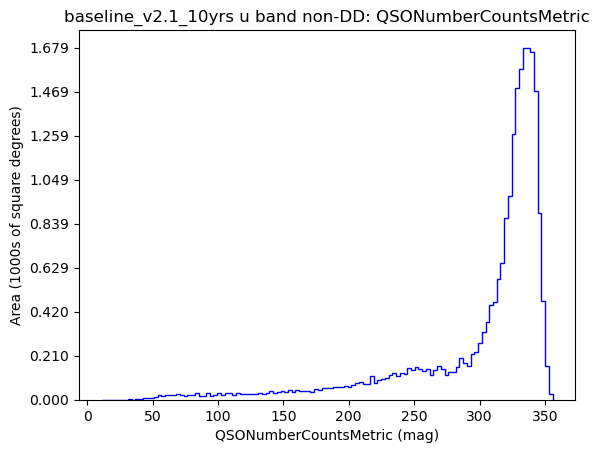

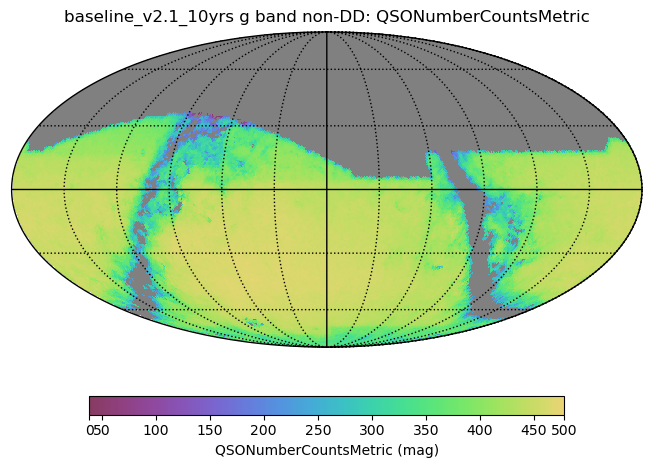

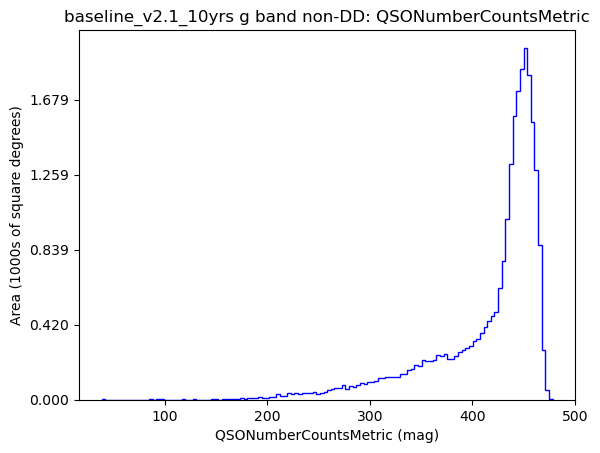

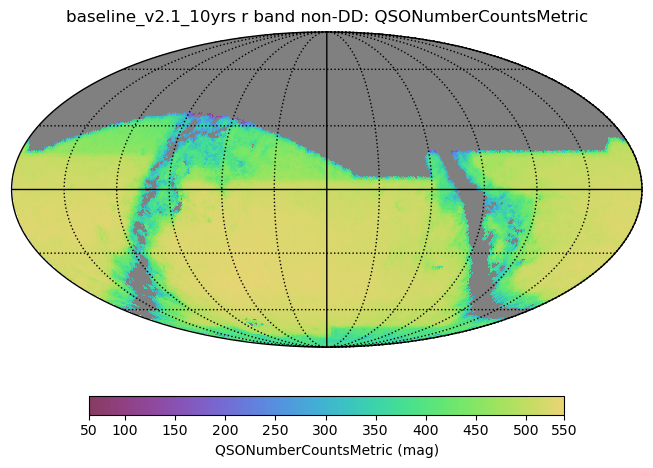

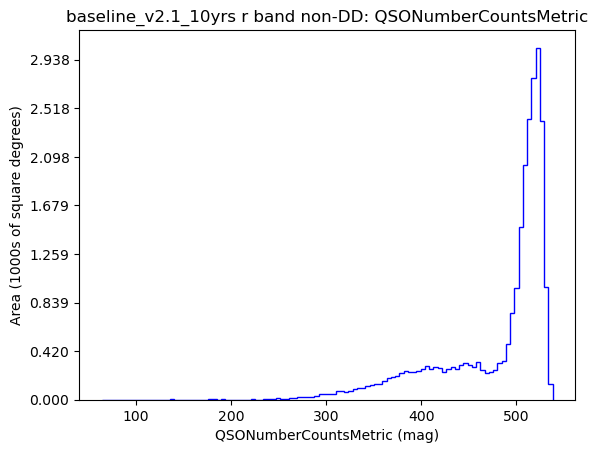

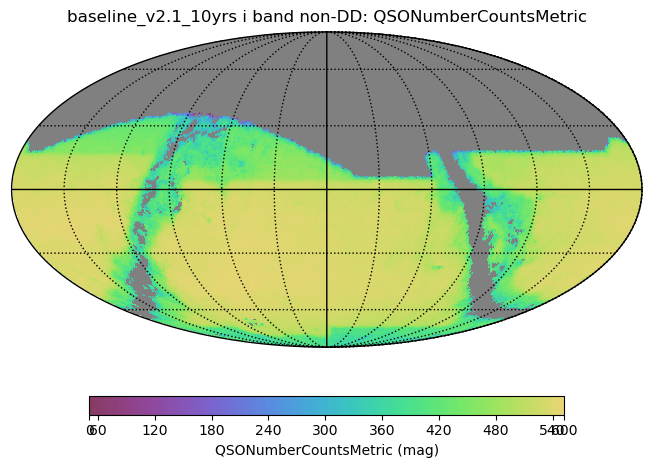

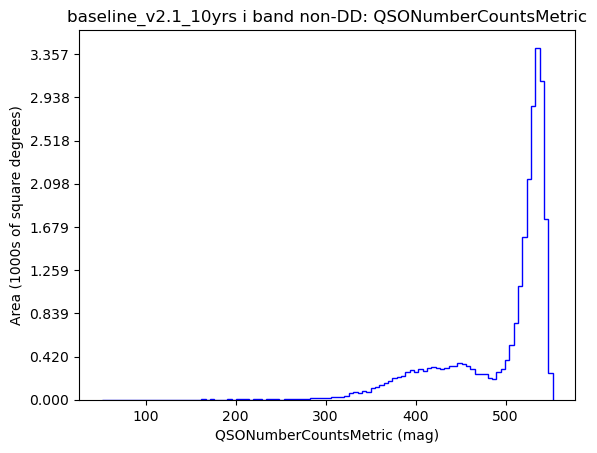

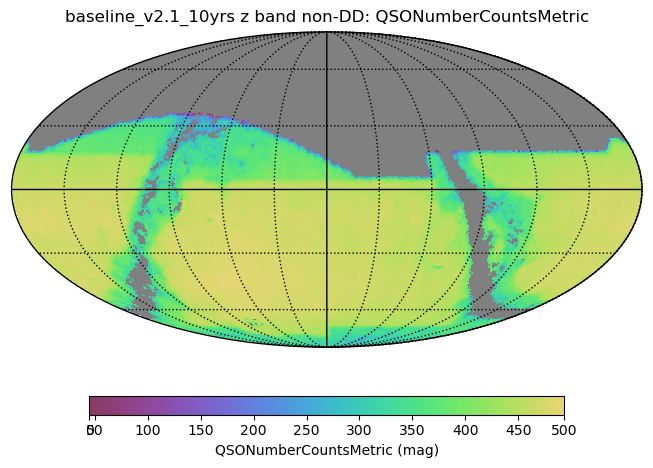

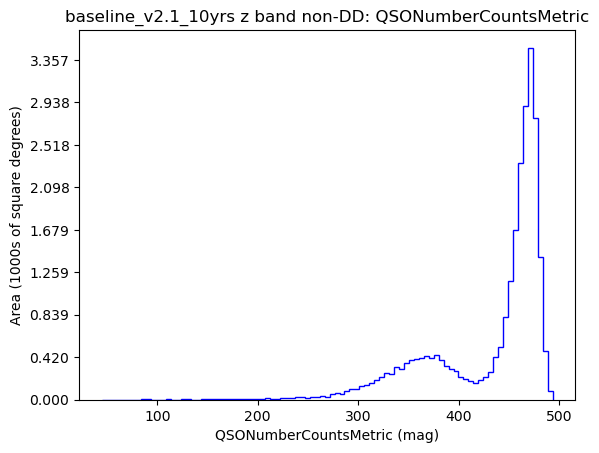

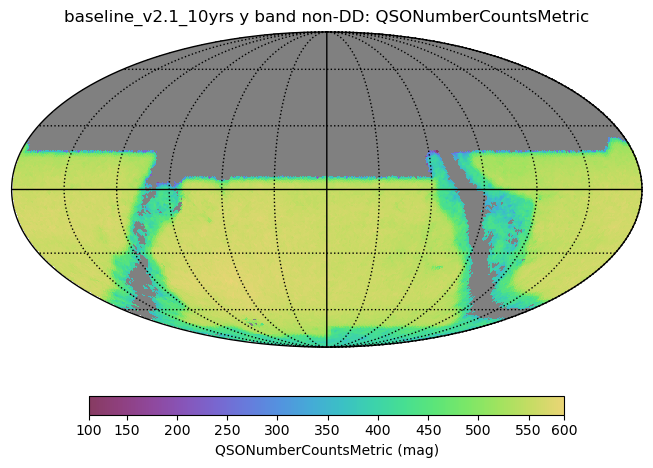

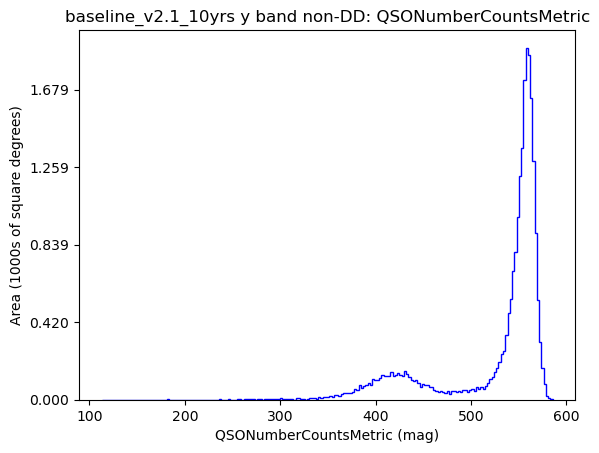

In [6]:
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    bundle[f].plot()

In [7]:
summary = maf.SumMetric(col='metric', metric_name='Total QSO')
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    bundle[f].set_summary_metrics([summary])
    bundle[f].compute_summary_stats()

In [8]:
pd.DataFrame([bundle[f].summary_values['Total QSO'] for f in bundle], index=list(bundle.keys()), 
             columns=['Total QSO'])

,Total QSO
u,8.484432e+06
g,1.313569e+07
r,1.518473e+07
i,1.566792e+07
z,1.365721e+07
y,1.482795e+07


In [9]:
# Variance across (most of) current set of simulations?
summaries = maf.get_metric_summaries()
families = maf.get_family_descriptions()

In [10]:
QSOtotals_allsky = [f'Total QSO QSONumberCountsMetric {f} band and non-DD HealpixSlicer' for f in 
                    ('u', 'g', 'r', 'i', 'z', 'y')]
short_names = [f'N QSO {f} band' for f in ('u', 'g', 'r', 'i', 'z', 'y')]
styles = ['c-', 'g-', 'y-', 'r-', 'm-', 'k-']
mset = maf.create_metric_set_df('N QSO all sky', QSOtotals_allsky, short_names, styles)
fams = [f for f in families.index if not f.startswith('ddf')]
runs = families.explode(['run']).loc[fams]['run']

# toss out the 2.99 runs
runs = [run for run in runs if '2.99' not in run]

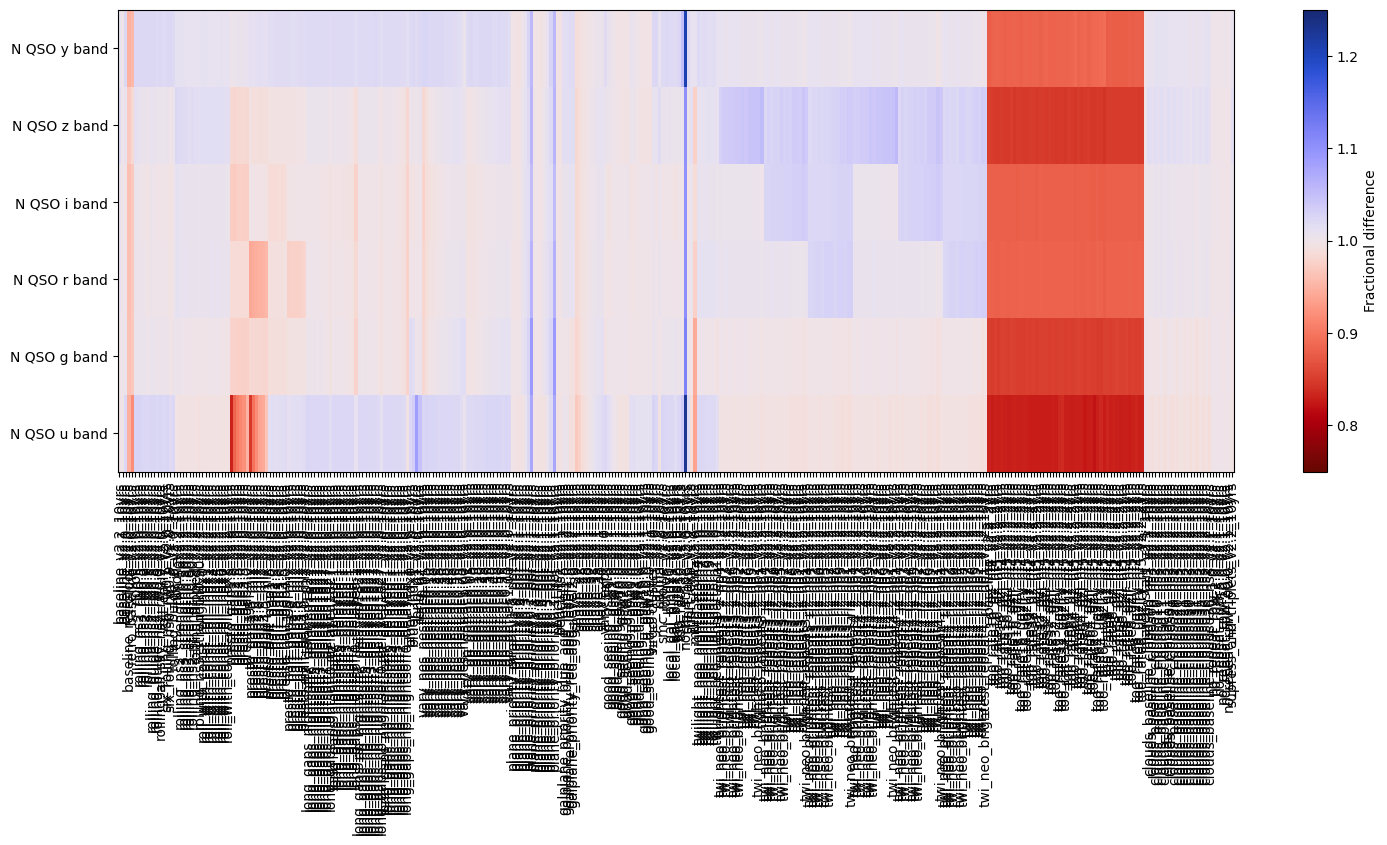

In [11]:
# Plot the *normalized* values
fig, ax = maf.plot_run_metric_mesh(summaries.loc[runs, mset.loc['N QSO all sky']['metric']], 
                                   baseline_run='baseline_v2.1_10yrs',
                                  color_range=0.5,
                                   metric_label_map=mset.loc['N QSO all sky']['short_name'],
                                  metric_set=mset.loc['N QSO all sky'])
fig.set_figwidth(18)

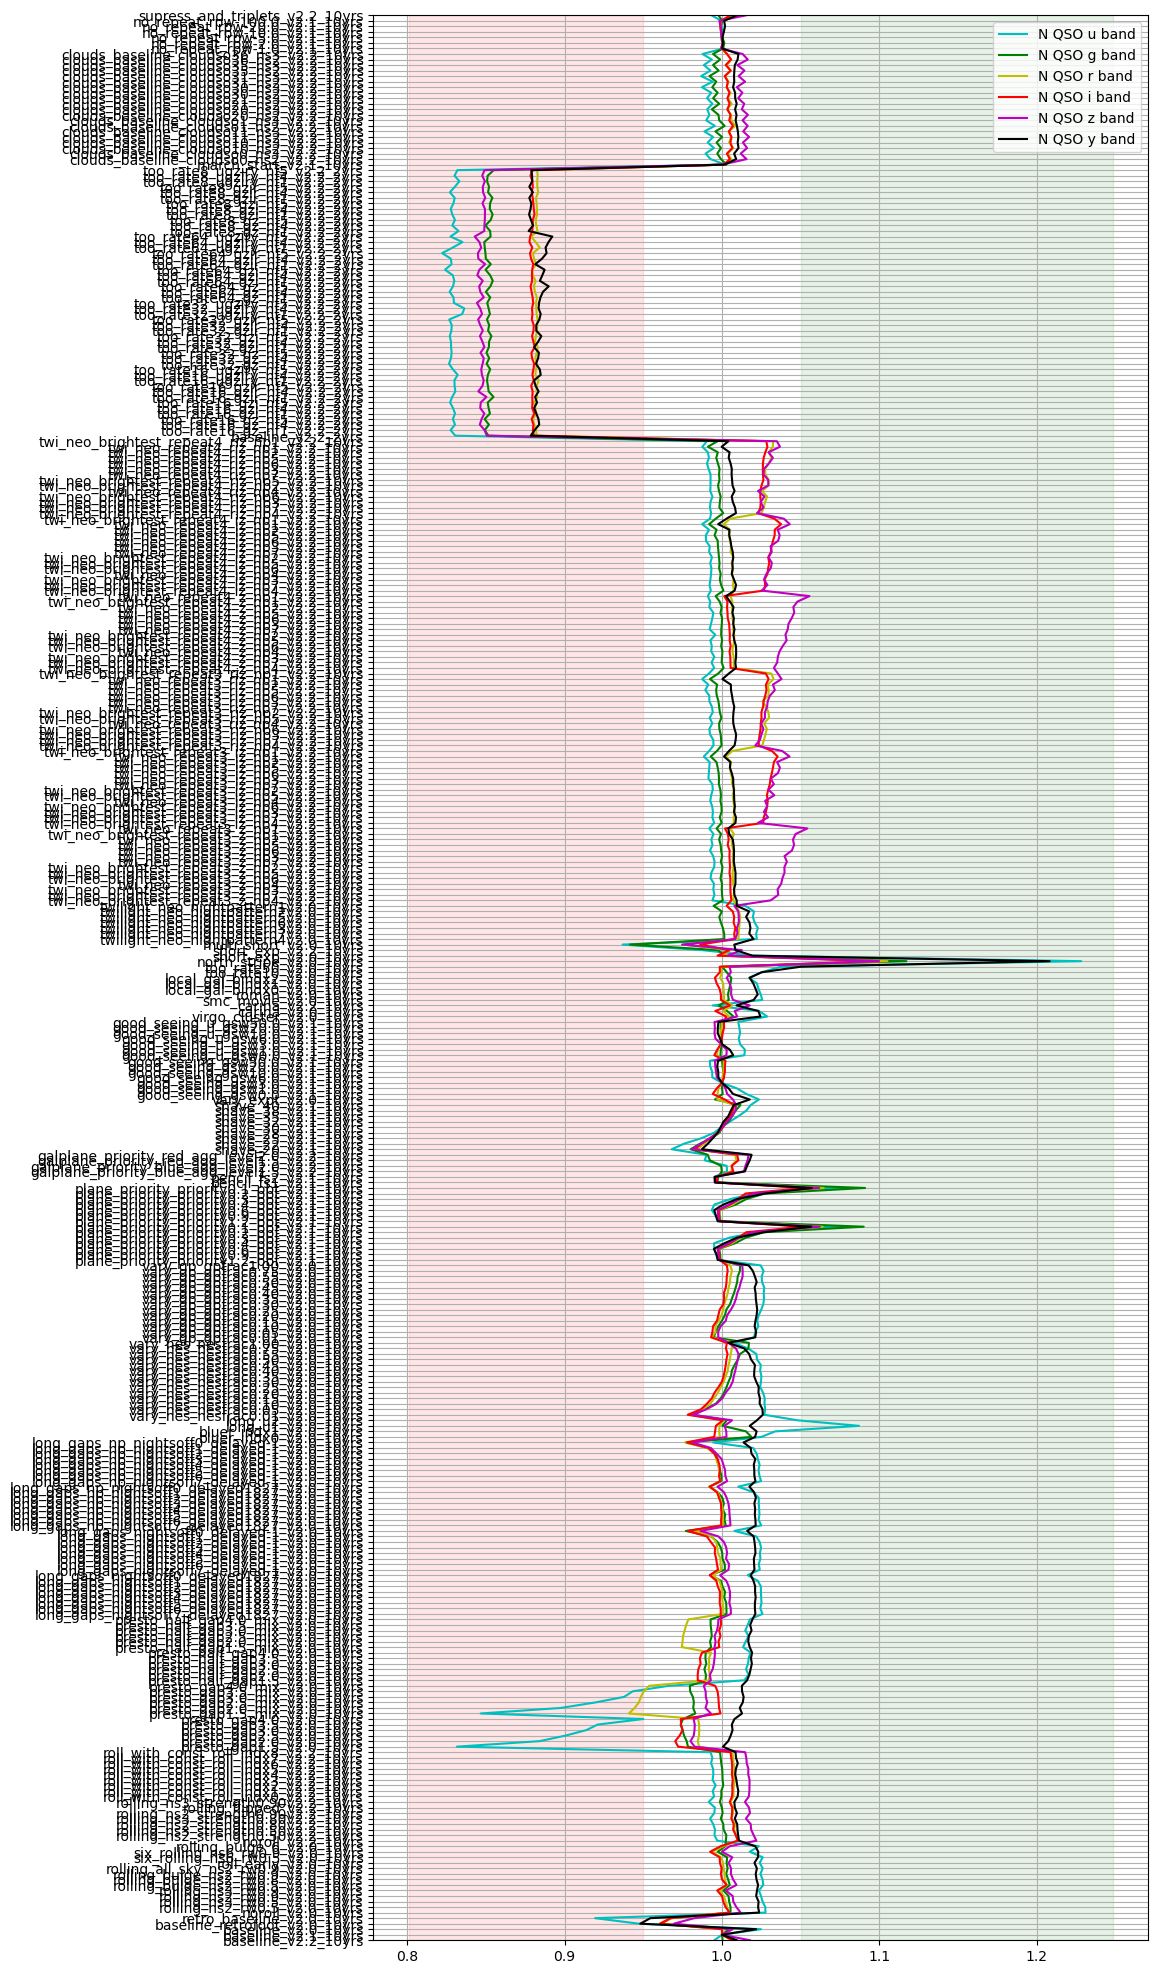

In [12]:
# Plot the normalized values, in a different way
fig, ax = maf.plot_run_metric(summaries.loc[runs, mset.loc["N QSO all sky"]['metric']],
                             baseline_run='baseline_v2.1_10yrs',
                             metric_label_map=mset.loc['N QSO all sky']['short_name'],
                             metric_set=mset.loc['N QSO all sky'],
                             horizontal_quantity='value',
                             vertical_quantity='run')
fig.set_figheight(25)